<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-02-18 17:13:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.207, 173.194.206.207, 142.251.171.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   220MB/s    in 0.5s    

2024-02-18 17:13:04 (220 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref=zipfile.ZipFile('pizza_steak.zip')

In [4]:
zip_ref.extractall()
zip_ref.close()

In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/test/

pizza  steak


In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [8]:

# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train


750

In [9]:

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [10]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


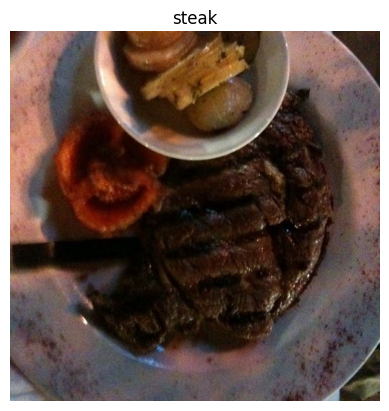

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

array([[[ 46,  13,   4],
        [ 45,  12,   3],
        [ 47,  13,   4],
        ...,
        [ 55,  33,  20],
        [ 63,  41,  27],
        [ 66,  44,  30]],

       [[ 48,  14,   5],
        [ 47,  13,   4],
        [ 48,  14,   5],
        ...,
        [ 56,  34,  21],
        [ 58,  36,  22],
        [ 60,  38,  24]],

       [[ 58,  21,  12],
        [ 55,  18,   9],
        [ 55,  18,   9],
        ...,
        [ 55,  33,  20],
        [ 53,  31,  17],
        [ 53,  31,  17]],

       ...,

       [[130, 147, 157],
        [128, 145, 155],
        [129, 145, 158],
        ...,
        [ 68,  45,  31],
        [ 72,  49,  35],
        [ 66,  43,  29]],

       [[140, 156, 169],
        [138, 154, 167],
        [137, 153, 168],
        ...,
        [ 74,  51,  37],
        [ 68,  45,  29],
        [ 57,  34,  18]],

       [[151, 167, 180],
        [148, 164, 177],
        [145, 161, 176],
        ...,
        [ 66,  43,  29],
        [ 71,  48,  32],
        [ 76,  53,  37]]], dtype=uint8)
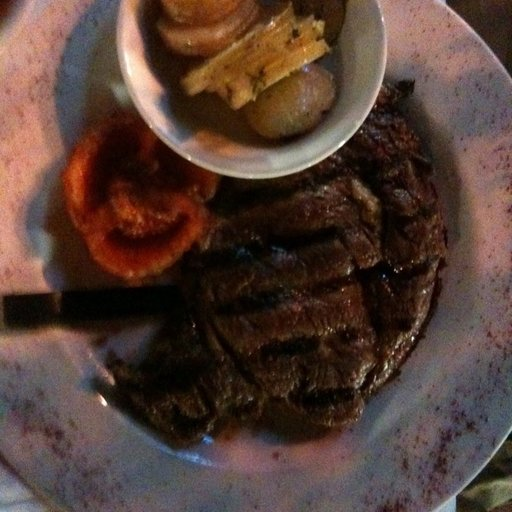

In [12]:
# View the img (actually just a big array/tensor)
img

In [13]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

In [14]:
img/255

array([[[0.18039216, 0.05098039, 0.01568627],
        [0.17647059, 0.04705882, 0.01176471],
        [0.18431373, 0.05098039, 0.01568627],
        ...,
        [0.21568627, 0.12941176, 0.07843137],
        [0.24705882, 0.16078431, 0.10588235],
        [0.25882353, 0.17254902, 0.11764706]],

       [[0.18823529, 0.05490196, 0.01960784],
        [0.18431373, 0.05098039, 0.01568627],
        [0.18823529, 0.05490196, 0.01960784],
        ...,
        [0.21960784, 0.13333333, 0.08235294],
        [0.22745098, 0.14117647, 0.08627451],
        [0.23529412, 0.14901961, 0.09411765]],

       [[0.22745098, 0.08235294, 0.04705882],
        [0.21568627, 0.07058824, 0.03529412],
        [0.21568627, 0.07058824, 0.03529412],
        ...,
        [0.21568627, 0.12941176, 0.07843137],
        [0.20784314, 0.12156863, 0.06666667],
        [0.20784314, 0.12156863, 0.06666667]],

       ...,

       [[0.50980392, 0.57647059, 0.61568627],
        [0.50196078, 0.56862745, 0.60784314],
        [0.50588235, 0

In [15]:
import tensorflow as tf
tf_img=tf.constant(img)

In [16]:
tf_img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 46,  13,   4],
        [ 45,  12,   3],
        [ 47,  13,   4],
        ...,
        [ 55,  33,  20],
        [ 63,  41,  27],
        [ 66,  44,  30]],

       [[ 48,  14,   5],
        [ 47,  13,   4],
        [ 48,  14,   5],
        ...,
        [ 56,  34,  21],
        [ 58,  36,  22],
        [ 60,  38,  24]],

       [[ 58,  21,  12],
        [ 55,  18,   9],
        [ 55,  18,   9],
        ...,
        [ 55,  33,  20],
        [ 53,  31,  17],
        [ 53,  31,  17]],

       ...,

       [[130, 147, 157],
        [128, 145, 155],
        [129, 145, 158],
        ...,
        [ 68,  45,  31],
        [ 72,  49,  35],
        [ 66,  43,  29]],

       [[140, 156, 169],
        [138, 154, 167],
        [137, 153, 168],
        ...,
        [ 74,  51,  37],
        [ 68,  45,  29],
        [ 57,  34,  18]],

       [[151, 167, 180],
        [148, 164, 177],
        [145, 161, 176],
        ...,
        [ 66,  43,  2

In [17]:
tf_img_norm=tf_img/255

In [18]:
tf_img_norm

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.18039216, 0.05098039, 0.01568628],
        [0.1764706 , 0.04705882, 0.01176471],
        [0.18431373, 0.05098039, 0.01568628],
        ...,
        [0.21568628, 0.12941177, 0.07843138],
        [0.24705882, 0.16078432, 0.10588235],
        [0.25882354, 0.17254902, 0.11764706]],

       [[0.1882353 , 0.05490196, 0.01960784],
        [0.18431373, 0.05098039, 0.01568628],
        [0.1882353 , 0.05490196, 0.01960784],
        ...,
        [0.21960784, 0.13333334, 0.08235294],
        [0.22745098, 0.14117648, 0.08627451],
        [0.23529412, 0.14901961, 0.09411765]],

       [[0.22745098, 0.08235294, 0.04705882],
        [0.21568628, 0.07058824, 0.03529412],
        [0.21568628, 0.07058824, 0.03529412],
        ...,
        [0.21568628, 0.12941177, 0.07843138],
        [0.20784314, 0.12156863, 0.06666667],
        [0.20784314, 0.12156863, 0.06666667]],

       ...,

       [[0.50980395, 0.5764706 , 0.6156863 ],
        [0.50

# Building the CNN

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
# Normalizing the data
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

In [21]:
#crating the paths for datasets
train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

In [31]:
#converting the data into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)
valid_data=valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42
)

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,  # Corrected argument name
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.Conv2D(10, 3, activation='relu'),  # Corrected spelling of 'layers'
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),  # Corrected spelling of 'layers' and 'pool_size'
    tf.keras.layers.Flatten(),  # Flatten layer added
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history1=model1.fit(train_data,epochs=5,verbose=0,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

In [33]:
model1.evaluate(valid_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.3549 - accuracy: 0.8360


[0.354871541261673, 0.8360000252723694]

#trying a non cnn model

In [37]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy']
              )

history = model2.fit(train_data,
                     epochs=20,
                     verbose=0,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))


In [38]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model2.evaluate(valid_data)

16/16 [==============================] - 1s 86ms/step - loss: 0.6552 - accuracy: 0.7640


[0.6552265286445618, 0.7639999985694885]

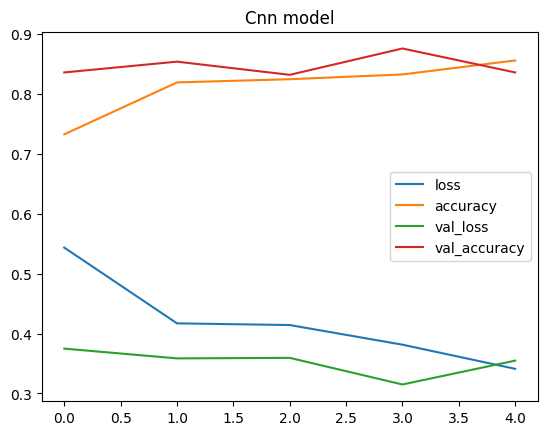

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
history1_pd=pd.DataFrame(history1.history)
history1_pd.plot()
plt.title('Cnn model')
plt.show()



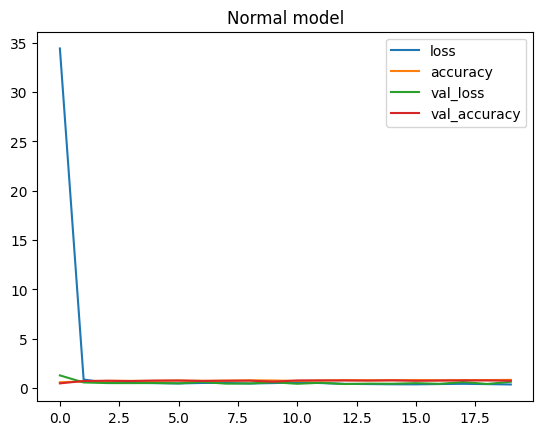

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
history_pd=pd.DataFrame(history.history)
history_pd.plot()
plt.title('Normal model')
plt.show()